In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sys.path.append('../tools/')
import tools
%matplotlib inline

## DNN from scratch

approximate sin function from random values.

In [2]:
x = np.linspace(-2, 2, 1000)

In [3]:
y = np.sin(x)**2

In [4]:
df = pd.DataFrame({'x':x,'y':y})

In [9]:
class DeepNeuralNetwork():
    """
    Deep Neural Net built from scratch
    capable of regression tasks
    TODO: Vanishing/Exploding gradient is an issue right now, very sensitive to initial weight placement.
    """
    def __init__(self,X,y):
        
        self.X = X
        self.y = y
        self.output = 0
        self.layerdims = []
        self.layers = []
        self.weights = []
        self.derivlayers = []
        self.gradients = []
        self.initialized = False
        
    def add(self,nodes):
        
        if len(self.layerdims) == 0:
        
            self.layerdims.append((self.X.shape[1],nodes))
        else:
            last = self.layerdims[-1]
            self.layerdims.append((last[1],nodes))
    
    def initialize(self,low = -10,high=10,numoutputs=1):
        '''
        make sure to do this after adding all the layers
        '''
        #takes two elements, the first entry is lower bound & second is upper. Default is -10 to 10. 
        #Default number of outputs is 1 output
        self.weights = []
        for i in range(len(self.layerdims)):
            layerdim = self.layerdims[i]
            weight = np.random.uniform(low=low,high=high,size=(layerdim[0],layerdim[1]))
            self.weights.append(weight)
            if (i == (len(self.layerdims)-1)) and self.initialized == False:
                self.weights.append( np.random.uniform(low=low,high=high,size=(layerdim[1],numoutputs)))
                self.layerdims.append((layerdim[1],numoutputs))
        self.initialized = True
        
    def foward(self):
        '''
        foward pass
        '''
        self.layers = []
        self.derivlayers = []
        weights = self.weights
        self.layers.append(self.X)
        i = 0
        val = 0
        while i < len(weights):
            if i == 0:
                val = tools.sigmoid(self.X.dot(weights[i]))
                derival = tools.sigmoid(self.X.dot(weights[i]),True)
                self.layers.append(val)
                self.derivlayers.append(derival)
            elif i == (len(weights)-1):
                val = val.dot(weights[i])
                derival = 1
                self.derivlayers.append(derival)
            else:
                derival = tools.sigmoid(val.dot(weights[i]),True)
                val = tools.sigmoid(val.dot(weights[i]))
                self.layers.append(val)
                self.derivlayers.append(derival)
            i += 1
        self.output = val
    
    def calculate_gradients(self):
        
        self.gradients = []
        y = self.y
        output = self.output
        loss = output - y
        layers = self.layers
        derivlayers = self.derivlayers
        i = len(self.weights)-1
        #print("LOSS")
        #print(loss[:10])
        while i >= 0:
            if(i ==  (len(self.weights)-1)):
                chain = loss
                self.gradients.append(self.layers[i].T.dot(loss))
            else:
                chain = (chain.dot(self.weights[i+1].T))*derivlayers[i]
                self.gradients.append(layers[i].T.dot(chain))
            i-=1
        #print("GRADIENTS")
        #print(self.gradients)   
        self.gradients = self.gradients[::-1]
            
    def train(self,epochs=1000,learning_rate=0.001):
        '''
        Trains the neural network
        epochs- number of times the network uses the full data set to train
        learning_rate- how much influence the gradient has on the weights, for grad descent
        '''
        if self.initialized == False:
            self.initialize()
        self.foward()
        for i in range(epochs):
            MSE = np.sum((self.y - self.output)**2)
            print("MSE at epoch " + str(i) + ": " + str(MSE))
            self.calculate_gradients()
            for i in range(len(self.weights)):
                #print("START")
                #print(self.weights[i])
                self.weights[i] = self.weights[i] - learning_rate*self.gradients[i]
                #print("AFTER")
                #print(self.weights[i])
            self.foward()
        

In [20]:
m = DeepNeuralNetwork(x.reshape(x.shape[0],1),y)
m.y = y.reshape(y.shape[0],1)
m.add(20)
m.add(3)
m.add(4)

#m.calculate_gradients()
m.train(1000,0.001)

MSE at epoch 0: 3764.5647088474807
MSE at epoch 1: 21774.90656066338
MSE at epoch 2: 8700.159096828374
MSE at epoch 3: 1556.1747551040896
MSE at epoch 4: 517.2920572147235
MSE at epoch 5: 223.98041514167852
MSE at epoch 6: 133.1732690668801
MSE at epoch 7: 103.95513233174998
MSE at epoch 8: 93.97518555651095
MSE at epoch 9: 90.13187857644651
MSE at epoch 10: 88.32064562673885
MSE at epoch 11: 87.2358264824502
MSE at epoch 12: 86.4519734746327
MSE at epoch 13: 85.82306855182708
MSE at epoch 14: 85.29304621971662
MSE at epoch 15: 84.83582500548059
MSE at epoch 16: 84.43620869729347
MSE at epoch 17: 84.08365915955184
MSE at epoch 18: 83.77012815778103
MSE at epoch 19: 83.48918983893843
MSE at epoch 20: 83.23561173371417
MSE at epoch 21: 83.00509196292109
MSE at epoch 22: 82.79407319654646
MSE at epoch 23: 82.5996009472898
MSE at epoch 24: 82.41921210042312
MSE at epoch 25: 82.25084597044105
MSE at epoch 26: 82.0927728082311
MSE at epoch 27: 81.94353605096339
MSE at epoch 28: 81.8019054792

MSE at epoch 233: 65.94945399092262
MSE at epoch 234: 65.88742754075827
MSE at epoch 235: 65.82549083664568
MSE at epoch 236: 65.76364325780791
MSE at epoch 237: 65.70188418345808
MSE at epoch 238: 65.64021299277702
MSE at epoch 239: 65.57862906489146
MSE at epoch 240: 65.51713177885135
MSE at epoch 241: 65.45572051360767
MSE at epoch 242: 65.39439464798993
MSE at epoch 243: 65.33315356068327
MSE at epoch 244: 65.27199663020598
MSE at epoch 245: 65.21092323488656
MSE at epoch 246: 65.14993275284071
MSE at epoch 247: 65.08902456194829
MSE at epoch 248: 65.02819803983016
MSE at epoch 249: 64.9674525638248
MSE at epoch 250: 64.90678751096516
MSE at epoch 251: 64.84620225795479
MSE at epoch 252: 64.78569618114459
MSE at epoch 253: 64.7252686565089
MSE at epoch 254: 64.66491905962171
MSE at epoch 255: 64.60464676563274
MSE at epoch 256: 64.54445114924343
MSE at epoch 257: 64.48433158468268
MSE at epoch 258: 64.42428744568275
MSE at epoch 259: 64.36431810545467
MSE at epoch 260: 64.304422936

MSE at epoch 462: 56.80547575980191
MSE at epoch 463: 61.67184333979327
MSE at epoch 464: 56.70550118084384
MSE at epoch 465: 61.602048615413544
MSE at epoch 466: 56.60499025215704
MSE at epoch 467: 61.53165587046271
MSE at epoch 468: 56.50392860968234
MSE at epoch 469: 61.46064334055181
MSE at epoch 470: 56.40230187458714
MSE at epoch 471: 61.38899002500338
MSE at epoch 472: 56.30009562822778
MSE at epoch 473: 61.31667557753721
MSE at epoch 474: 56.19729539011603
MSE at epoch 475: 61.2436802092204
MSE at epoch 476: 56.093886598607654
MSE at epoch 477: 61.169984602383224
MSE at epoch 478: 55.98985459407451
MSE at epoch 479: 61.09556983435927
MSE at epoch 480: 55.88518460435597
MSE at epoch 481: 61.020417310044
MSE at epoch 482: 55.77986173232466
MSE at epoch 483: 60.9445087023955
MSE at epoch 484: 55.67387094542969
MSE at epoch 485: 60.86782590011235
MSE at epoch 486: 55.56719706711115
MSE at epoch 487: 60.79035096182175
MSE at epoch 488: 55.45982477000391
MSE at epoch 489: 60.71206607

MSE at epoch 689: 48.646045818664206
MSE at epoch 690: 40.65883593474252
MSE at epoch 691: 48.50579960597275
MSE at epoch 692: 40.48868225700705
MSE at epoch 693: 48.364033218837875
MSE at epoch 694: 40.317009184294065
MSE at epoch 695: 48.220684109807536
MSE at epoch 696: 40.143779859515305
MSE at epoch 697: 48.07569389832475
MSE at epoch 698: 39.96896105443235
MSE at epoch 699: 47.929008125079754
MSE at epoch 700: 39.79252276704888
MSE at epoch 701: 47.780576009000214
MSE at epoch 702: 39.61443784309519
MSE at epoch 703: 47.63035021182361
MSE at epoch 704: 39.43468162666186
MSE at epoch 705: 47.478286614035184
MSE at epoch 706: 39.253231643208
MSE at epoch 707: 47.32434410463985
MSE at epoch 708: 39.07006731677052
MSE at epoch 709: 47.16848438654828
MSE at epoch 710: 38.88516972195585
MSE at epoch 711: 47.0106717984581
MSE at epoch 712: 38.6985213704516
MSE at epoch 713: 46.85087315379114
MSE at epoch 714: 38.51010603106387
MSE at epoch 715: 46.68905759669749
MSE at epoch 716: 38.319

MSE at epoch 919: 26.739855924156526
MSE at epoch 920: 18.224311665530614
MSE at epoch 921: 26.641552439443508
MSE at epoch 922: 18.166978678195537
MSE at epoch 923: 26.544761959766284
MSE at epoch 924: 18.111734004952815
MSE at epoch 925: 26.449383837342605
MSE at epoch 926: 18.05843988696771
MSE at epoch 927: 26.355322508390152
MSE at epoch 928: 18.00696363222402
MSE at epoch 929: 26.262487645132673
MSE at epoch 930: 17.95717784677651
MSE at epoch 931: 26.17079416163867
MSE at epoch 932: 17.90896062661276
MSE at epoch 933: 26.080162239406544
MSE at epoch 934: 17.86219567791038
MSE at epoch 935: 25.99051725264935
MSE at epoch 936: 17.816772397415576
MSE at epoch 937: 25.90178969479343
MSE at epoch 938: 17.772585896533737
MSE at epoch 939: 25.81391503875814
MSE at epoch 940: 17.729536989056133
MSE at epoch 941: 25.726833590516588
MSE at epoch 942: 17.68753213577479
MSE at epoch 943: 25.640490301156994
MSE at epoch 944: 17.646483358623783
MSE at epoch 945: 25.55483457111162
MSE at epoch

In [21]:
m.output[:10]

array([[1.09496849],
       [1.09586827],
       [1.09676462],
       [1.09765746],
       [1.09854669],
       [1.09943223],
       [1.10031398],
       [1.10119185],
       [1.10206573],
       [1.10293554]])

In [22]:
newd = pd.DataFrame({'x':x,'y':m.output.reshape(m.output.shape[0],)})

Predicted after 10000 epochs

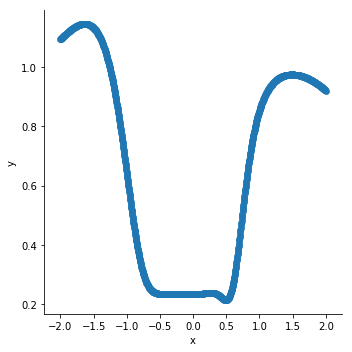

In [23]:
sns.lmplot(x='x', y='y',data=newd,
           fit_reg=False, # No regression line
          )  

Original sin wave

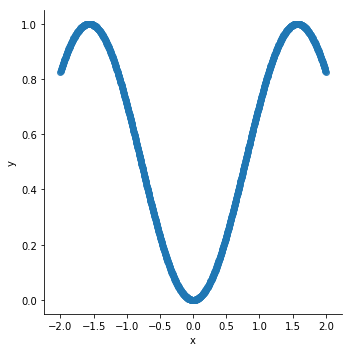

In [24]:
sns.lmplot(x='x', y='y',data=df,
           fit_reg=False, # No regression line
          )   